In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical


In [2]:
data = pd.read_csv(r"D:/data/A_Z Handwritten Data.csv").astype('float32')

In [4]:
X = data.drop('0',axis = 1)
Y = data['0']


train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))


word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

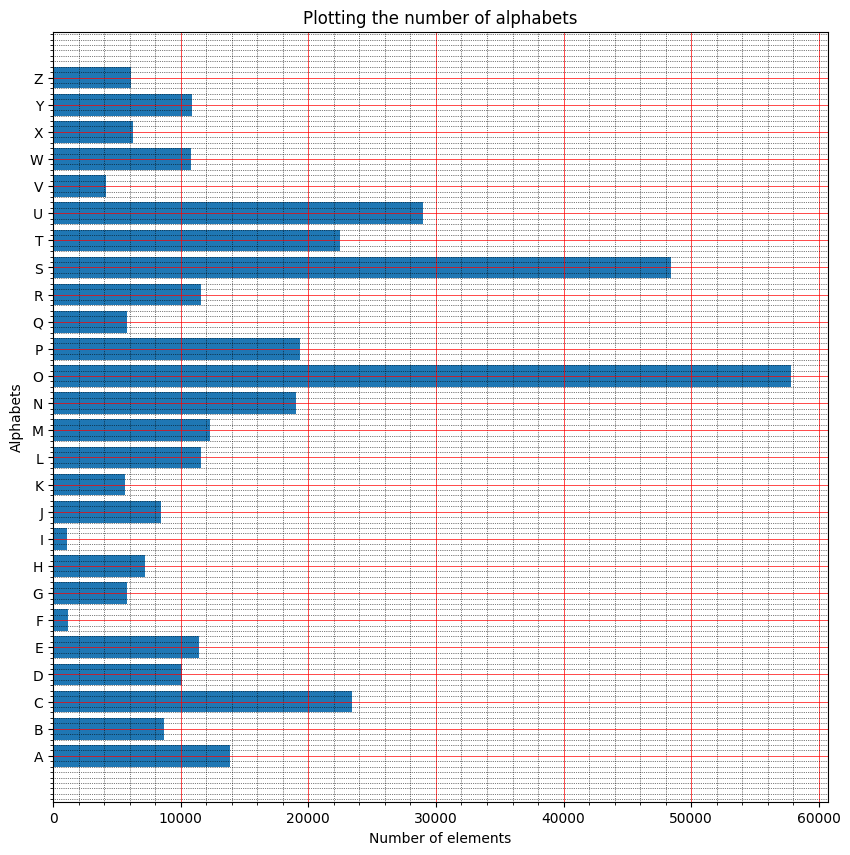

In [5]:
y_int = np.intp(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)


fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)


plt.xlabel("Number of elements")

plt.ylabel("Alphabets")
 
plt.title("Plotting the number of alphabets")

plt.minorticks_on()

plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

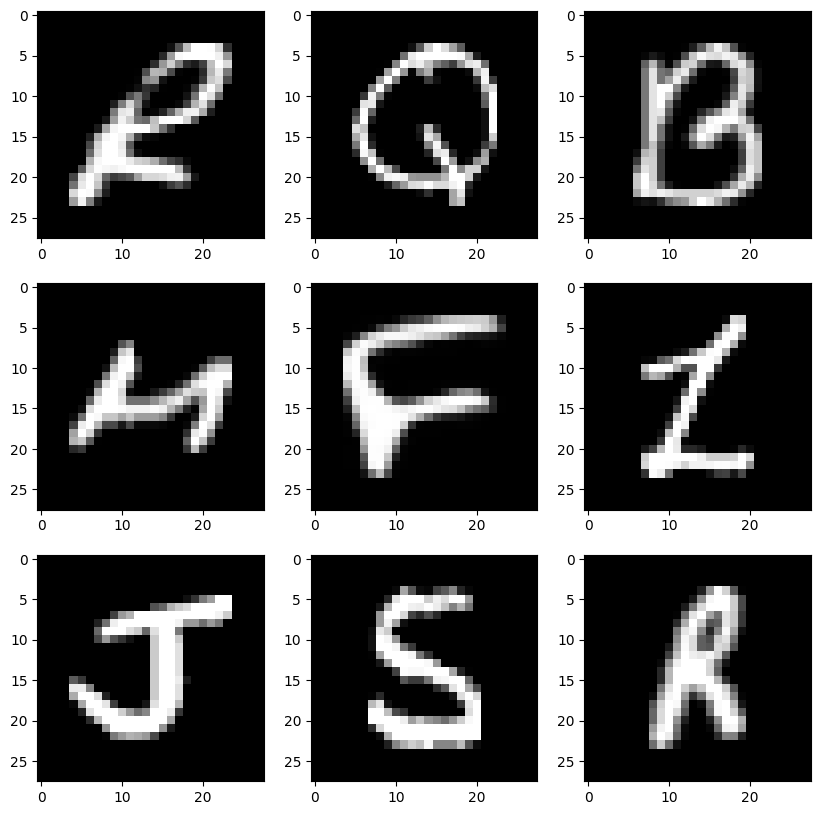

In [6]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap=plt.get_cmap('gray'))
plt.show()

In [7]:

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("The new shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("The new shape of train data: ", test_X.shape)

train_Y = to_categorical(train_y, num_classes = 26, dtype='int')
print("The new shape of train labels: ", train_Y.shape)

test_Y = to_categorical(test_y, num_classes = 26, dtype='int')
print("The new shape of test labels: ", test_Y.shape)

The new shape of train data:  (297960, 28, 28, 1)
The new shape of train data:  (74490, 28, 28, 1)
The new shape of train labels:  (297960, 26)
The new shape of test labels:  (74490, 26)


In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [9]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=20, validation_data = (test_X,test_Y))

Epoch 1/20
9312/9312 [==============================] - 228s 24ms/step - loss: 0.1612 - accuracy: 0.9561 - val_loss: 0.0809 - val_accuracy: 0.9776
Epoch 2/20
9312/9312 [==============================] - 222s 24ms/step - loss: 0.0719 - accuracy: 0.9801 - val_loss: 0.0601 - val_accuracy: 0.9834
Epoch 3/20
9312/9312 [==============================] - 224s 24ms/step - loss: 0.0602 - accuracy: 0.9833 - val_loss: 0.0644 - val_accuracy: 0.9829
Epoch 4/20
9312/9312 [==============================] - 230s 25ms/step - loss: 0.0558 - accuracy: 0.9848 - val_loss: 0.0580 - val_accuracy: 0.9851
Epoch 5/20
9312/9312 [==============================] - 231s 25ms/step - loss: 0.0517 - accuracy: 0.9863 - val_loss: 0.1118 - val_accuracy: 0.9724
Epoch 6/20
9312/9312 [==============================] - 226s 24ms/step - loss: 0.0486 - accuracy: 0.9870 - val_loss: 0.0615 - val_accuracy: 0.9841
Epoch 7/20
9312/9312 [==============================] - 233s 25ms/step - loss: 0.0482 - accuracy: 0.9875 - val_loss: 0

In [10]:
model.summary()
model.save(r'model_hand1.h5')

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

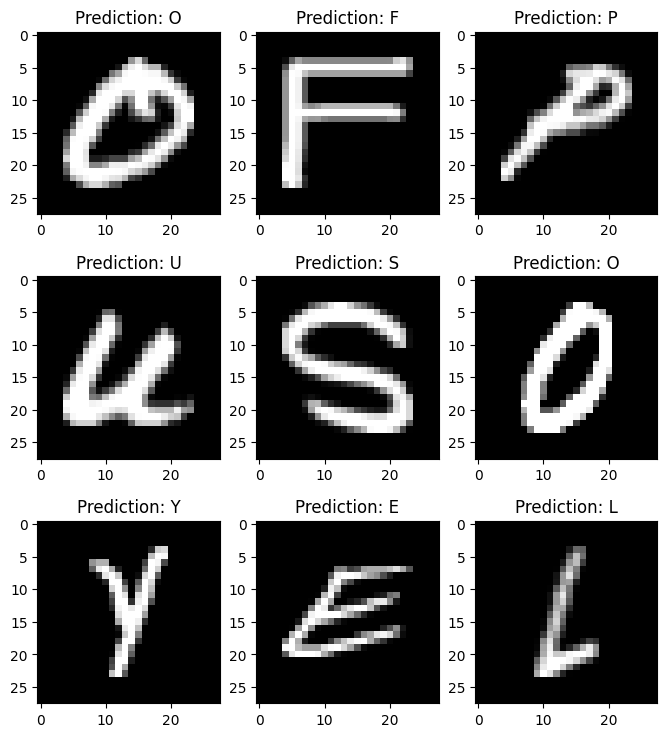

In [11]:

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img,  cmap=plt.get_cmap('gray'))
    
    pred = word_dict[np.argmax(test_Y[i])]
    ax.set_title("Prediction: "+pred)

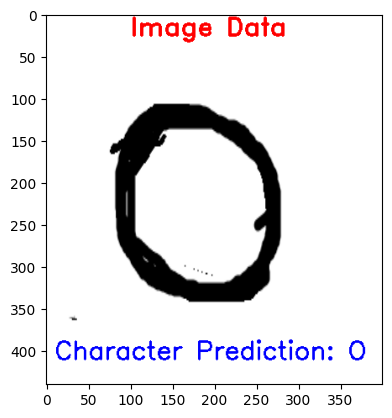

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model('C:\\Users\\Duc.PM205068\\model_hand1.h5')
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

img = cv2.imread(r'C:\Users\Duc.PM205068\Downloads\img\9.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final = np.reshape(img_final, (1,28,28,1))


cv2.putText(img, "Image Data", (100,25), cv2.FONT_HERSHEY_DUPLEX, fontScale=1, thickness=2, color=(255,0,0))
cv2.putText(img, "Character Prediction: " + img_pred, (10,410), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2, color=(0,0,255))

plt.imshow(img)
plt.show()
